# Multiclass classification


In [4]:
# 기본적인 CNN을 하기 위한 라이브러리 불러오기

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CNN을 위한 데이터 다운로드

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-06-13 13:41:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.48, 34.64.4.112, 34.64.4.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: `10_food_classes_all_data.zip.3'

10_food_classes_all 100%[===================>] 495.13M  32.6MB/s    in 17s     

2021-06-13 13:41:41 (29.9 MB/s) - `10_food_classes_all_data.zip.3' saved [519183241/519183241]



In [3]:
# 다운로드한 파일 압출 해제

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
# 압축해제한 디렉토리의 구조 및 파일 확인

import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"{dirpath}에 {len(dirnames)}개 디렉토리와 {len(filenames)}개 이미지가 존재합니다.")

10_food_classes_all_data에 2개 디렉토리와 0개 이미지가 존재합니다.
10_food_classes_all_data/test에 10개 디렉토리와 0개 이미지가 존재합니다.
10_food_classes_all_data/test/ice_cream에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/test/chicken_curry에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/test/steak에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/test/sushi에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/test/chicken_wings에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/test/grilled_salmon에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/test/hamburger에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/test/pizza에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/test/ramen에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/test/fried_rice에 0개 디렉토리와 250개 이미지가 존재합니다.
10_food_classes_all_data/train에 10개 디렉토리와 0개 이미지가 존재합니다.
10_food_classes_all_data/train/ice_cream에 0개 디렉토리와 750개 이미지가 존재합니다.
10_food_classes_all_data/train/chicken_curry에 0개 디렉토리와 750개 이미지가 존재합니다.
10_food_classes_all_data/trai

In [6]:
# 학습 및 테스트 데이터의 기본 디렉토리를 설정

train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [7]:
# 라벨 생성

import pathlib

data_dir = pathlib.Path(train_dir)
class_name = np.array(sorted([
    item.name for item in data_dir.glob("*")
])
)

class_name

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [8]:
import random
import matplotlib.image as mping

def view_random_image(target_dir, target_class):
    target_folder = target_dir +"/"+ target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mping.imread(target_folder + "/"  + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f"Image shape: {img.shape}")

    return img

In [9]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="validation accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

Image shape: (512, 384, 3)


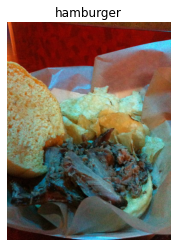

In [10]:
# 데이터 시각화

import random

img = view_random_image(
    target_dir = train_dir,
    target_class = random.choice(class_name)
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.) # 모든 값을 0 ~ 1 사이로 변경
test_datagen = ImageDataGenerator(rescale=1/255.) # 모든 값을 0 ~ 1 사이로 변경

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=30,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=30,
    class_mode="categorical"
)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:
# 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # 출력값은 softmax고 10개가 출력된다. (class 10개)

])

In [12]:
model_9.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [13]:
history_9 = model_9.fit(
    train_data,
    epochs = 5,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
250/250 [==============================] - 229s 913ms/step - loss: 2.2005 - accuracy: 0.1773 - val_loss: 2.0482 - val_accuracy: 0.2544
Epoch 2/5
250/250 [==============================] - 240s 958ms/step - loss: 1.9964 - accuracy: 0.3028 - val_loss: 1.9912 - val_accuracy: 0.3084
Epoch 3/5
250/250 [==============================] - 303s 1s/step - loss: 1.7392 - accuracy: 0.4017 - val_loss: 2.0059 - val_accuracy: 0.2896
Epoch 4/5
250/250 [==============================] - 293s 1s/step - loss: 1.2311 - accuracy: 0.5961 - val_loss: 2.3683 - val_accuracy: 0.2816
Epoch 5/5
250/250 [==============================] - 299s 1s/step - loss: 0.6551 - accuracy: 0.7880 - val_loss: 2.9535 - val_accuracy: 0.2760


In [29]:
model_9.evaluate(test_data)

84/84 [==============================] - 29s 342ms/step - loss: 2.9535 - accuracy: 0.2760


[2.9535107612609863, 0.2759999930858612]

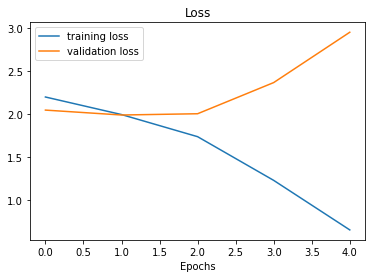

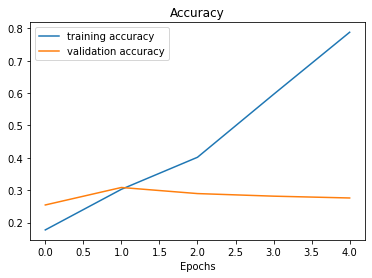

In [30]:
plot_loss_curves(history_9)

### 모델을 개선 시키는 방법
    1) 더많은 데이터 - 데이터가 많을수록 더 많은 패턴을 찾을 수 있다.
    2) 모델 단순화 - 너무 과도하게 학습을 시키지 않는다라는 개념. 패턴이 아닌 것도 패턴으로 인식하는 과정을 제거
    3) Data Augmentation 사용 : 데이터에 다양성을 인위적으로 추가하여 모델 학습이 어렵게 해서 패턴을 더 잘 찾도록 하는 방법
    4) 전이 학습

    ## 오버피팅(과적합)을 방지하는 방법들을 우리는 regulariztion(정규화) 라고 한다.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # 출력값은 softmax고 10개가 출력된다. (class 10개)
])


In [31]:

model_10.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_10 = model_10.fit(
    train_data,
    epochs = 5,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
250/250 [==============================] - 227s 903ms/step - loss: 2.1029 - accuracy: 0.2464 - val_loss: 1.9049 - val_accuracy: 0.3396
Epoch 2/5
250/250 [==============================] - 175s 700ms/step - loss: 1.7448 - accuracy: 0.4152 - val_loss: 1.8171 - val_accuracy: 0.3756
Epoch 3/5
250/250 [==============================] - 157s 626ms/step - loss: 1.3825 - accuracy: 0.5471 - val_loss: 1.9229 - val_accuracy: 0.3544
Epoch 4/5
250/250 [==============================] - 136s 542ms/step - loss: 0.9180 - accuracy: 0.7148 - val_loss: 2.0322 - val_accuracy: 0.3484
Epoch 5/5
250/250 [==============================] - 145s 580ms/step - loss: 0.4722 - accuracy: 0.8747 - val_loss: 2.6044 - val_accuracy: 0.3040


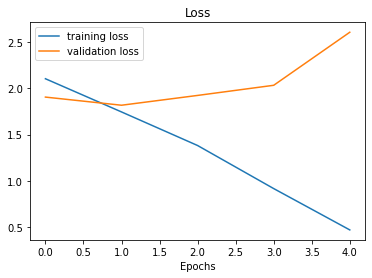

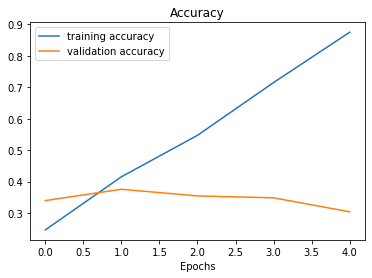

In [32]:
plot_loss_curves(history_10)

In [14]:
# 3. Data Augmentation

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 30,
    class_mode = "categorical"

)

Found 7500 images belonging to 10 classes.


In [20]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_11 = model_11.fit(
    train_data_augmented,
    epochs = 15,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/15
250/250 [==============================] - 530s 2s/step - loss: 2.2550 - accuracy: 0.1677 - val_loss: 2.0954 - val_accuracy: 0.2392
Epoch 2/15
250/250 [==============================] - 454s 2s/step - loss: 2.1403 - accuracy: 0.2315 - val_loss: 1.9949 - val_accuracy: 0.3052
Epoch 3/15
250/250 [==============================] - 275s 1s/step - loss: 2.0521 - accuracy: 0.2829 - val_loss: 1.8715 - val_accuracy: 0.3584
Epoch 4/15
250/250 [==============================] - 240s 959ms/step - loss: 1.9871 - accuracy: 0.3115 - val_loss: 1.8186 - val_accuracy: 0.3760
Epoch 5/15
250/250 [==============================] - 218s 870ms/step - loss: 1.9233 - accuracy: 0.3348 - val_loss: 1.7547 - val_accuracy: 0.4032
Epoch 6/15
250/250 [==============================] - 215s 859ms/step - loss: 1.8897 - accuracy: 0.3513 - val_loss: 1.7710 - val_accuracy: 0.3952
Epoch 7/15
250/250 [==============================] - 217s 870ms/step - loss: 1.8610 - accuracy: 0.3636 - val_loss: 1.7157 - val_accu

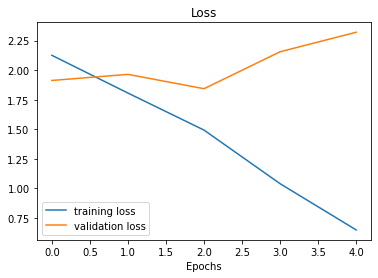

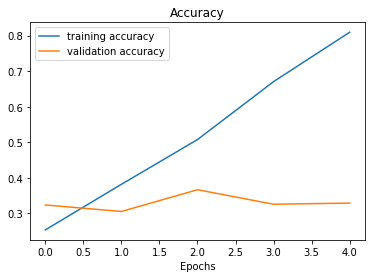

In [17]:
plot_loss_curves(history_11)

In [19]:
class_name

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [37]:
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_all_data/train/")
class_names = np.array(
    sorted(
        [item.name for item in data_dir.glob("*")]
    )
)

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [38]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2021-06-13 16:50:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: `03-sushi.jpeg.1'

03-sushi.jpeg.1     100%[===================>]   1.64M  5.29MB/s    in 0.3s    

2021-06-13 16:50:40 (5.29 MB/s) - `03-sushi.jpeg.1' saved [1725178/1725178]



In [39]:
def load_and_prep_image(filename, img_shape = 224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [img_shape, img_shape])
    img = img / 255.
    return img

In [40]:
food = load_and_prep_image("03-sushi.jpeg")

In [41]:
print(food.shape)

(224, 224, 3)


In [42]:
model_11.predict(tf.expand_dims(food, axis = 0))

array([[0.14758939, 0.23395766, 0.02026404, 0.15191941, 0.06986899,
        0.01123133, 0.08718763, 0.12791272, 0.0583988 , 0.09167009]],
      dtype=float32)

In [50]:
def pred_and_plot(model, filename, class_name):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, axis = 0))

    if len(pred[0]) > 1:
        pred_class = class_names[pred.argmax()]
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)


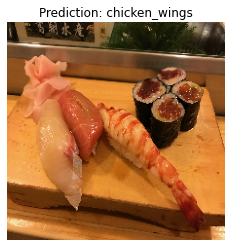

In [58]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

In [55]:
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [56]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

84/84 [==============================] - 17s 200ms/step - loss: 1.6829 - accuracy: 0.4360


[1.6828858852386475, 0.4359999895095825]

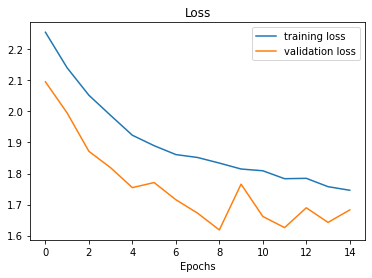

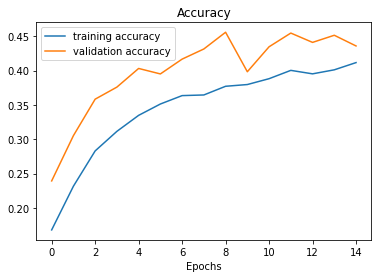

In [57]:
plot_loss_curves(history_11)